# Courbes de niveau devoir

### dépendances logicielles

In [2]:
# Third-Party Libraries
# ---------------------

# Autograd & Numpy
import autograd
import autograd.numpy as np

# Pandas
import pandas as pd

# Matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 10] # [width, height] (inches). 

# Jupyter & IPython
from IPython.display import display

### Différentation automatique

In [3]:
def grad(f):
    g = autograd.grad
    def grad_f(x, y):
        return np.array([g(f, 0)(x, y), g(f, 1)(x, y)])
    return grad_f

In [4]:
def J(f):
    j = autograd.jacobian
    def J_f(x, y):
        return np.array([j(f, 0)(x, y), j(f, 1)(x, y)]).T
    return J_f

### Fonction display_contour

In [5]:
def display_contour(f, x, y, levels):
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)
    fig, ax = plt.subplots()
    contour_set = plt.contour(
        X, Y, Z, colors="grey", linestyles="dashed", 
        levels=levels 
    )
    ax.clabel(contour_set)
    plt.grid(True)
    plt.xlabel("$x_1$") 
    plt.ylabel("$x_2$")
    plt.gca().set_aspect("equal")

### Fonctions de références 

In [6]:
def f1(x1, x2):
    x1 = np.array(x1)
    x2 = np.array(x2)
    return 3.0 * x1 * x1 - 2.0 * x1 * x2 + 3.0 * x2 * x2 

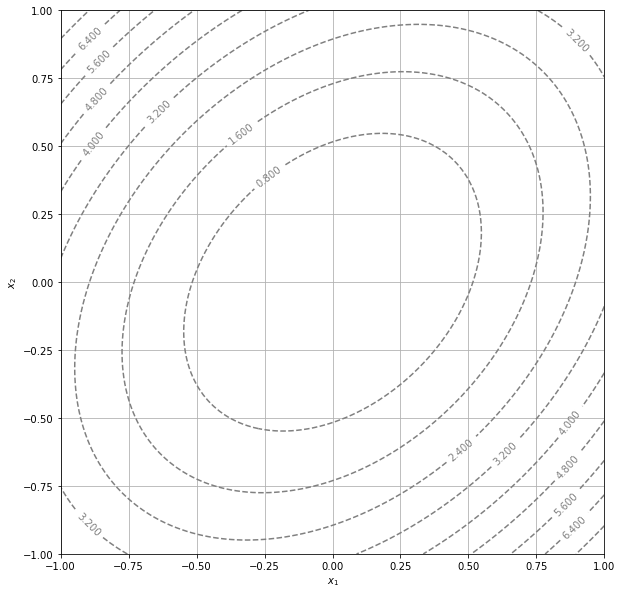

In [7]:
display_contour(
    f1, 
    x=np.linspace(-1.0, 1.0, 100), 
    y=np.linspace(-1.0, 1.0, 100), 
    levels=10 # 10 levels, automatically selected
)

In [8]:
def f2(x1, x2):
    return (x1 - 1)**2 + (x1 - x2**2)**2

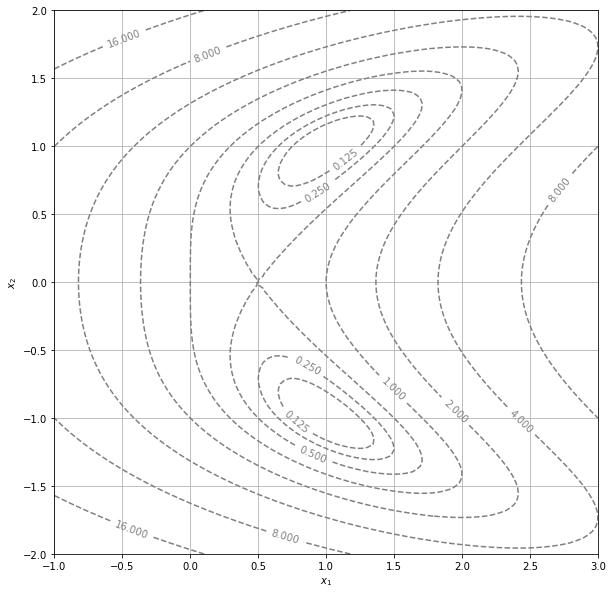

In [9]:
display_contour(
    f2, 
    x=np.linspace(-1.0, 3.0, 100), 
    y=np.linspace(-2.0, 2.0, 100), 
    levels=[2**i for i in range(-3, 8)] # levels: [0.125, 0.25, ..., 64, 128]
)

In [10]:
def f3(x, y):
    return np.sin(x + y) - np.cos(x * y) - 1 + 0.001 * (x * x + y * y)

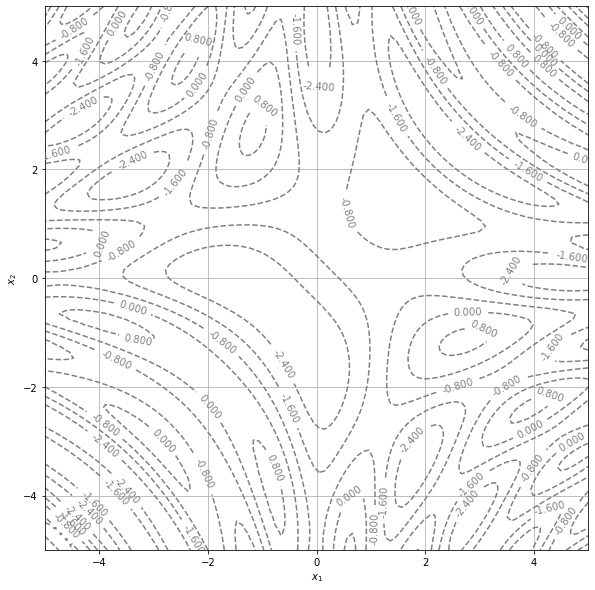

In [11]:
display_contour(
    f3, 
    x=np.linspace(-5.0, 5.0, 100), 
    y=np.linspace(-5.0, 5.0, 100), 
    levels=5, # 5 levels, automatically selected
)

### Réponses aux questions 

#### Question 1

On appelle $C$, l'ensemble de niveau $c$ de $f$. 

- $f$ est continue et {$c$} est un fermé, donc par caractérisation des fermés : $C$=$f^{-1}(\{c\})$ est un fermé. 

- Montrons que $C$ est bornée. \
Par l'absurde on suppose $C$ non borné, c'est à dire :   $\forall A \in \mathbb{R} ,\; \exists (x_1,x_2) \in \mathbb{R}^2$ $ $ tel que  $\|(x_1,x_2)\| \geq A $ et $ f(x_1,x_2)= c $ \
Or, $f(x_1, x_2) \to +\infty$ quand $\|(x_1,x_2)\| \to +\infty$, donc $ \exists B \in \mathbb{R} $, $\forall (x_1,x_2)\in \mathbb{R}^2$, $\|(x_1,x_2)\| \geq B \Longrightarrow
\|f(x_1,x_2)\|$ $ > c $ \
En prenant $(x_1,x_2) \in \mathbb{R}^2  $ tel que $\|(x_1,x_2)\| \geq max(A,B) $  , on a $f(x_1, x_2)= c $ et $ f(x_1, x_2) > c $ : absurde. Donc $C$ est bornée. 


$C$ étant fermé et borné en dimension finie, c'est donc un compact. C'est aussi un sous-ensemble fermé de $\mathbb{R}^2$ complet, donc $C$ est complet.


#### Question 2

$p(x_1,x_2)$ est la projection du vecteur$ \begin{bmatrix} x_1-x_{10}\\ x_2 -x_{20} \end{bmatrix}$ dans la direction orthogonale à droite au gradient de $f$ au point $x_0$.

#### Question 3

On définit une fonction $g :\mathbb{R}^2\times\mathbb{R} \to \mathbb{R}^2$ tel que  $g : (x,t) \mapsto (f(x)-c \;,\; p(x)-t))$ 

- $g$ est continûment différentiable car $f$ et $p$ le sont.
- Le déterminant de $ \partial_x g$ vaut $ \left| \begin{array}\ \frac{\partial f}{\partial x_1} & \frac{\partial f}{\partial x_2} \\ \frac{\partial p}{\partial x_1} & \frac{\partial p}{\partial x_2} \end{array}
\right| = -[ (\partial_1 f)^2 + (\partial_2 f)^2]$. Or le gradient $f$ ne s'annule pas dans un voisinage du point $x_0$, il a donc au moins une composante non nulle sur ce voisinage. Le déterminant est donc non nulle autour de ce même voisinage. Ainsi, $ \partial_x g$ est inversible au voisinage du point $x_0$.

- $g(x_0\;,\; p(x_0))=(0,0)$

D'après le théorème des fonctions implicites, il existe des voisinages ouverts  $U$ de $x_0$ et $V$ de $p(x_0)$ et une unique fonction implicite $ \gamma : V \to \mathbb{R}^2$, continûment différentiable et telle que pour tout $ x \in U$, $g(x,t)=(0,0) \iff \gamma(t) = x$ 

Or, $p(x_0)=0$ appartient à $V$ ouvert, donc il existe $ \varepsilon > 0 $ tel que $ ]-\varepsilon,\varepsilon[ \subset V$. Et pour $(x,t) \in \mathbb{R}^2 
\times\;\mathbb{R}$, $g(x,t)=0 \iff f(x)=c \; $et$ \; p(x)=t$

On a donc bien le résultat demandé : il existe un $\varepsilon > 0$ et une fonction (continûment différentiable) $\gamma :\left]-\varepsilon,\varepsilon \right[ \to \mathbb{R}^2$ tels que dans un voisinage ouvert de $x_0,$ $f(x_1,x_2) = c$ si et seulement si $(x_1, x_2) = \gamma(t)$ où $t = p(x_1, x_2)$.

#### Question 4

Soit $t \in ]-\varepsilon,\varepsilon[$. On pose $x=\gamma(t)$. Or d'après la question précédente : $g(x,t)=0 \iff x=\gamma(t) $ 
- On a donc $g(x,t)=0$ \
Puis $p(x)=t$ \
Et enfin $p(\gamma(t))=t$ \. \
    Or, ceci étant vérifié pour tout $t$ de $]-\varepsilon,\varepsilon[$, il vient : $po\gamma=id$ \
    En utilisant la règle de différenciation en chaine on obtient, pour tout $t$ de $]-\varepsilon,\varepsilon[$ :  ${\rm d}p(\gamma(t)). \gamma'(t) = 1 \not=0$ \
    Or $ {\rm d}p(\gamma(t))$ est une application linéaire, on a donc nécessairement $\gamma'(t) \not =0$.

- De même, $g(x,t)=0$ \
Donc $f(x)=f(\gamma(t)=c$ \
On obtient grâce à la règle de la chaine :$\; {\rm d}{f(\gamma(t))}.(\gamma'(t))=0$ \
Or cette expression est égale à $\langle \nabla f (\gamma(t)),\gamma'(t)\rangle$. Le produit scalaire étant nul, les deux vecteurs sont orthogonaux.

On a montré que : pour tout $t \in \left]-\varepsilon, \varepsilon \right[$
le vecteur $\gamma'(t)$ est non nul et 
est orthogonal à $\nabla f(\gamma(t))$.




    

#### Question 5

La fonction Newton est destinée à tracer les points d'une courbe de niveau, et, sachant que la taille des points est importante, une grande précision n'est pas nécessaire. \
On peux donc prendre eps = $10^{-10}$ afin d'avoir une bonne précision, tout en restant plus grand que l'erreur systématique de l'ordinateur due au codage des doubles (erreur de l'ordre de $10^{-16}$)

In [12]:
N = 100
eps = 10**(-10)

#### Tâche 1

In [13]:
def contrainte(x, y):
    return x - y


def Newton(F, x0, y0, eps=eps, N=N):
    
    if np.shape(F(x0, y0)) != (2,):
        # Ce test sera utile par la suite pour savoir si la matrice de la fonction f est carré ou non. 
        # Si non, il faut la rendre carré avec la fonction FF.
        # Quand on appelle la fonction Newton avec une fonction à valeurs scalaire on rentre dans ce test.

        def FF(s, t):
            return np.array([F(s, t) - 0.8, contrainte(s, t)]) 
        # En première composante de FF, on soustrait 0.8 à F pour obtenir la bonne courbe de niveau.

        J_F = J(FF)
        for i in range(N):
            X0 = np.array([x0, y0])
            FX0 = FF(x0, y0)
            C = X0 - np.dot(np.linalg.inv(J_F(x0, y0)), FX0)  # Méthode de Newton en dimension 2.
            x = C[0]
            y = C[1]
            if np.sqrt((x - x0) ** 2 + (y - y0) ** 2) <= eps:
                return x, y
            x0, y0 = x, y
        else:
            raise ValueError(f"no convergence in {N} steps.")

    else: # Si on appelle la fonction Newton depuis la fonction Pt_suivant,
          # la matrice de la fonction f est déjà carrée, donc nul besoin de définir une nouvelle fonction.
        J_F = J(F)
        for i in range(N):
            X0 = np.array([x0, y0])
            FX0 = F(x0, y0)
            C = X0 - np.dot(np.linalg.inv(J_F(x0, y0)), FX0)
            x = C[0]
            y = C[1]
            if np.sqrt((x - x0) ** 2 + (y - y0) ** 2) <= eps:
                return x, y
            x0, y0 = x, y
        else:
            raise ValueError(f"no convergence in {N} steps.")
  

#### Tâche 2

(0.4472135954999579, 0.4472135954999579)

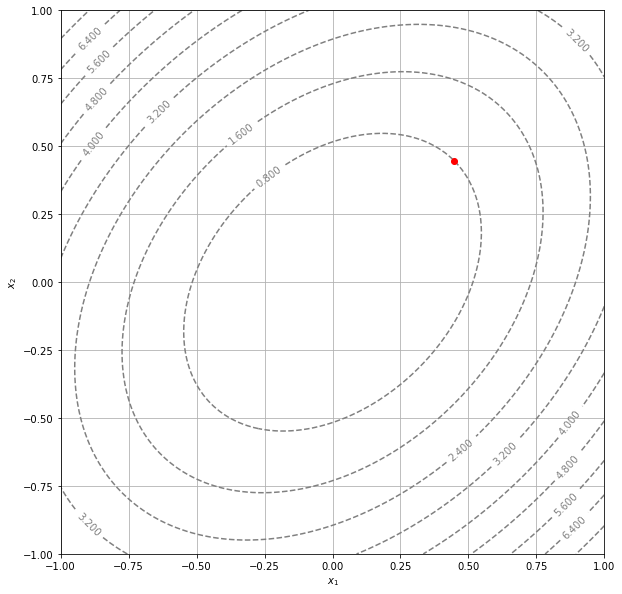

In [14]:
#exemple 1 avec x1=x2 comme contrainte
display_contour(
    f1, 
    x=np.linspace(-1.0, 1.0, 100), 
    y=np.linspace(-1.0, 1.0, 100), 
    levels=10
)

(x1,x2)=Newton(f1,0.8,0.8)  
plt.plot(x1,x2, 'bo',color='r'); 

Newton(f1,0.8,0.8) 


(0.5477225575051662, 0.18257418583505539)

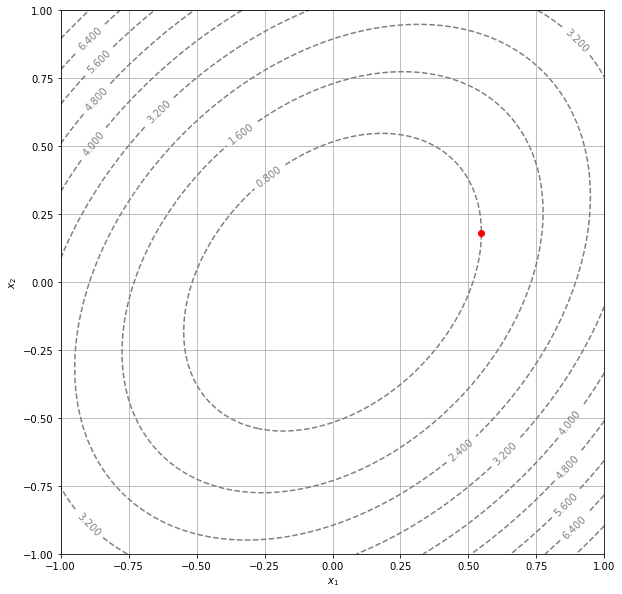

In [15]:
# exemple 2 avec comme contrainte x1= 3*x2 et comme point d'origine (0.75,0.25)

def contrainte (x,y): # définit la nouvelle contrainte 
    return x-3*y

display_contour(
    f1, 
    x=np.linspace(-1.0, 1.0, 100), 
    y=np.linspace(-1.0, 1.0, 100), 
    levels=10
)

(x1,x2)=Newton(f1,0.8,0.8)  
plt.plot(x1,x2, 'bo',color='r');

Newton(f1,1.,0.25)

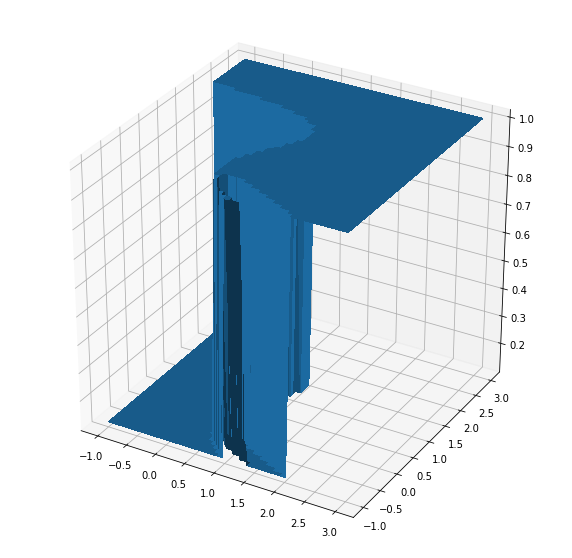

In [16]:
# exemple 3 : variation du point d'origine

def f2_newton(x1,x2): # fonction de Newton appliquée à f2 vectorisée.
    x1 = np.array(x1)
    x2 = np.array(x2)    
    return(Newton(f2,x1,x2))

x=np.linspace(-1,3,50)
y=np.linspace(-1,3,50)
X,Y=np.meshgrid(x,y)
f2_n_V=np.vectorize(f2_newton)
Z=np.array(f2_n_V(X,Y))[0] 
# on ne peut représenter que 3 valeurs en 3 dimensions, donc on prend seulement la 1ère composante de Z.
# La contrainte permet d'en déduire la 2ème composante.


fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z,linewidth=0, antialiased=False)

# Les coordonnées selon le plan (0,x,y) sont les coordonnées du point de départ auxquel on applique la fonction de Newton.
# La côte représente la première coordonnée du point obtenu par la méthode de Newton.

#### Question 6 + Tâche 3

In [22]:
def Pt_suivant(f, x0, y0, c, delta=0.1, eps=eps):

    g1, g2 = J(f)(x0, y0)

    a, b = x0+(delta/10)*g2/np.abs(g2), y0-(delta/10)*g1/np.abs(g1) 
    # Décalage dans la direction du gradient pour orienter la recherche "du bon côté".
    # Le facteur delta/10 est arbitraire (il ne faut pas trop s'éloigner du point d'origine en regard du point de départ
    # et du point que l'on cherche si l'on veut que la fonction Newton converge).

    def f1(x, y):
        return np.array([f(x, y)-c, np.sqrt((x-x0)**2+(y-y0)**2)-delta]) 
    # nouvelle contrainte s'assure que le point est à une distance delta du point d'origine.

    return Newton(f1, a, b, eps)

In [23]:
def level_curve(f, x0, y0, delta=0.1, n=50, eps=eps):
    liste = [[x0, y0]]
    c = f(x0, y0)

    for i in range(n):
        a, b = liste[-1][0], liste[-1][1]
        liste.append(Pt_suivant(f, a, b, c, delta, eps)) # on cherche par rapport à c et non pas à l'image du dernier point
                                                         # pour éviter une perte progressive de précision (même faible).
        
    return liste 

In [26]:
def display_contour2(f, x, y, x0, y0, levels): 
    # fonction display_contour modifiée pour faire apparaître les points de la ligne de niveau obtenus avec level_curve.
    
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)
    fig, ax = plt.subplots()
    contour_set = plt.contour(
        X, Y, Z, colors="grey", linestyles="dashed",
        levels=levels
    )
    ax.clabel(contour_set)
    plt.grid(True)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")
    plt.gca().set_aspect("equal")

    L = np.array(level_curve(f, x0, y0, n=100)).T
    plt.plot(L[0], L[1], 'o')

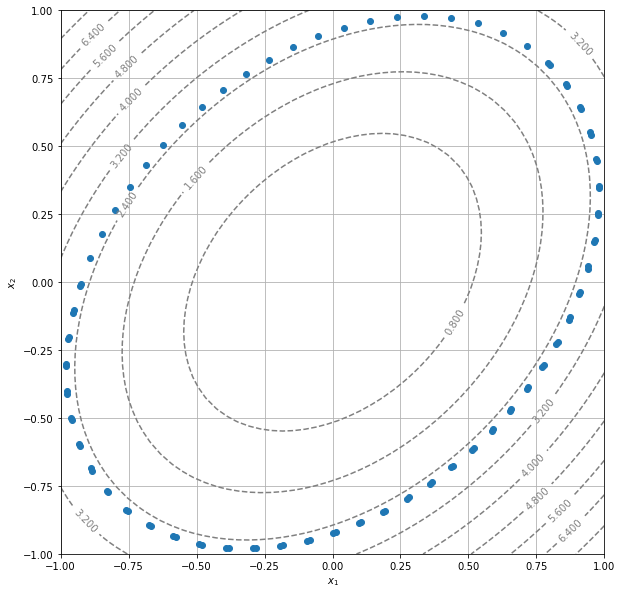

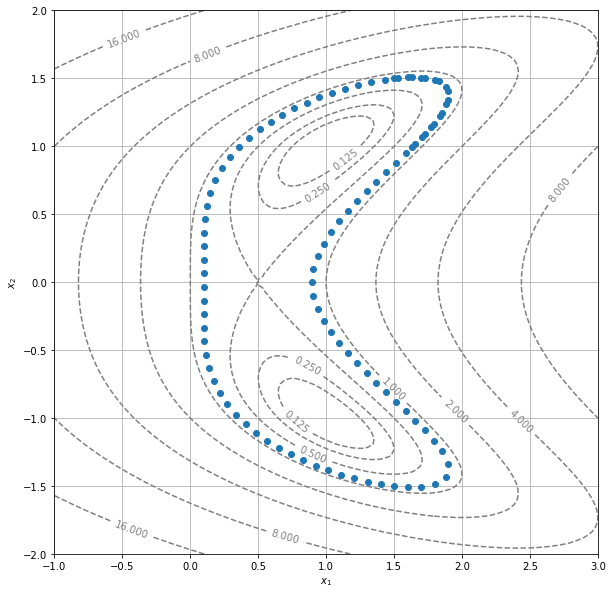

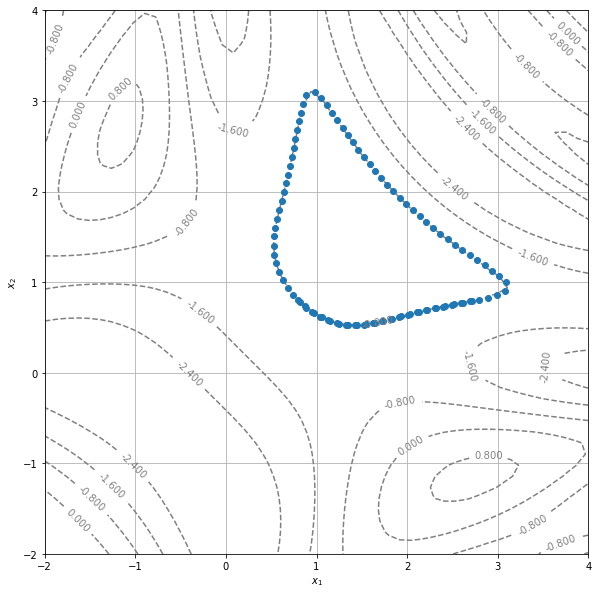

In [27]:
x=np.linspace(-1,1,50)
y=np.linspace(-1,1,50)
display_contour2(f1,x,y,0.8,0.8,10)

x=np.linspace(-1.0, 3.0, 100), 
y=np.linspace(-2.0, 2.0, 100)
display_contour2(f2,x,y,1.5,1.5,[2**i for i in range(-3, 8)])

x=np.linspace(-2,4,50)
y=np.linspace(-2,4,50)
display_contour2(f3,x,y,0.8,0.8,5)

#### Question 7 + Tâche 4

Si l'on considère la fonction de Rosenbrock, on observe qu'une seule courbe de niveau est intersectante (celles juste au-dessus et en-dessous ne le sont pas). En considérant l'erreur machine due au codage des nombres, il est très peu probable d'étudier cette ligne de niveau lorsqu'on considère un point de départ $(x_0,y_0)$. Ainsi, il n'est pas nécessaire de tester l'intersection du dernier segment avec tous les segments déjà produits. \
De manière plus générale, il est peu probable que l'on rencontre ces cas particuliers.

In [28]:
def level_curve2(f, x0, y0, delta=0.1, n=1000, eps=eps): 
    liste = [[x0, y0]]
    c = f(x0, y0)
    i = 0
    segment_atteint = False
    
    while i < n and segment_atteint == False :
        a, b = liste[-1][0], liste[-1][1]
        P = Pt_suivant(f, a, b, c, delta, eps)
        liste.append(P)
        if i > 1 and np.sqrt((P[0]-x0)**2+(P[1]-y0)**2) < delta and (
            np.sqrt((P[0]-liste[1][0])**2+(P[1]-liste[1][1])**2) < delta ): # Par construction, si un point vérifie ces deux 
                                                                            # conditions alors le segment qu'il construit avec
                                                                            # le dernier point coupe le premier segment.
            
            segment_atteint = True
        i = i+1

    return liste

In [30]:
def display_contour3(f, x, y, x0, y0, levels): 
    # même fonction que display_contour2 mais appelle la fonction level_curve2
    
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)
    fig, ax = plt.subplots()
    contour_set = plt.contour(
        X, Y, Z, colors="grey", linestyles="dashed",
        levels=levels
    )
    ax.clabel(contour_set)
    plt.grid(True)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")
    plt.gca().set_aspect("equal")

    L = np.array(level_curve2(f, x0, y0, n=100)).T
    plt.plot(L[0], L[1], 'o')

#### Tâche 5

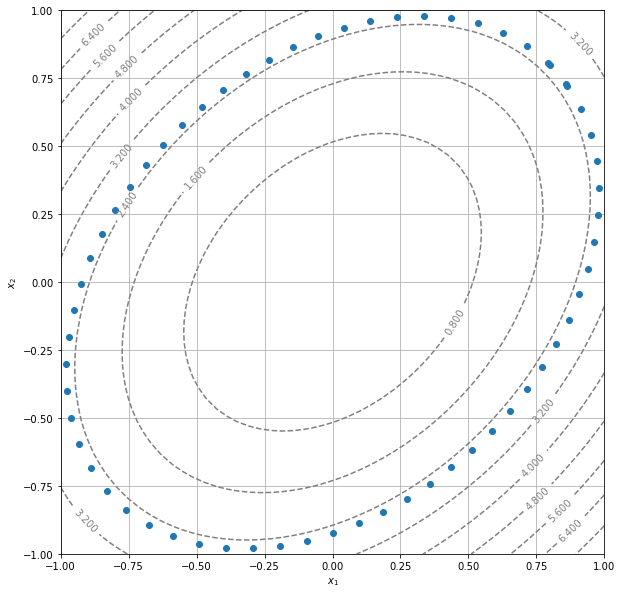

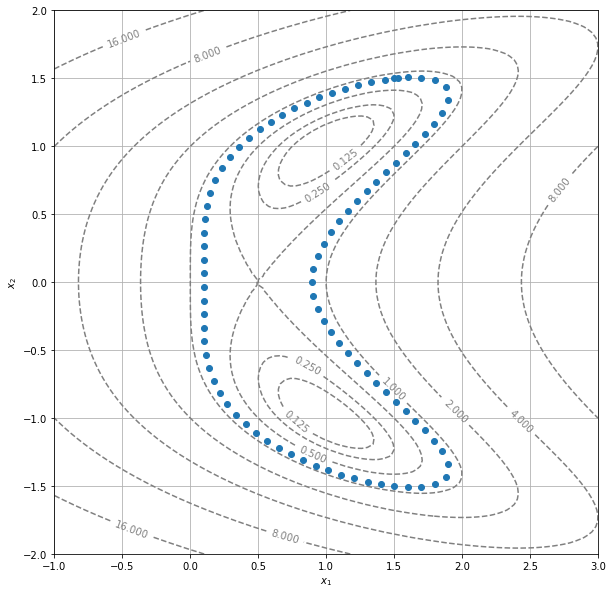

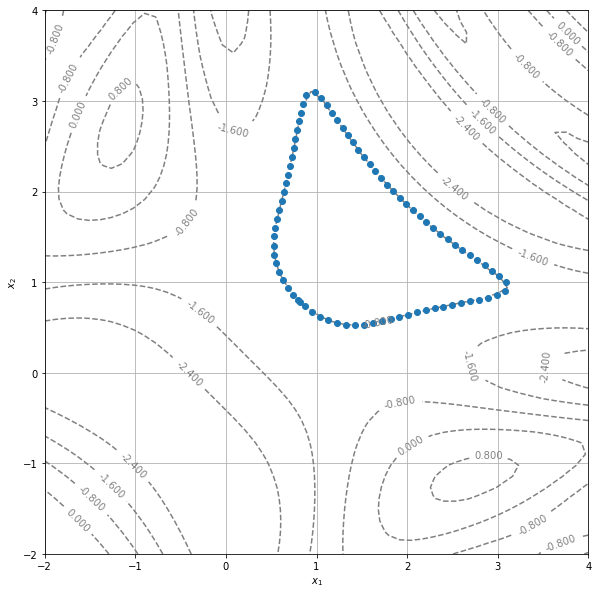

In [31]:
x=np.linspace(-1,1,50)
y=np.linspace(-1,1,50)
display_contour3(f1,x,y,0.8,0.8,10)

x=np.linspace(-1.0, 3.0, 100), 
y=np.linspace(-2.0, 2.0, 100)
display_contour3(f2,x,y,1.5,1.5,[2**i for i in range(-3, 8)])

x=np.linspace(-2,4,50)
y=np.linspace(-2,4,50)
display_contour3(f3,x,y,0.8,0.8,5)

#### Question 8

On a directement $  \gamma(0)=P_1= \begin{bmatrix} a \\ d \end{bmatrix} $ 

De plus, $\gamma(1)=P_2= \begin{bmatrix} a+b+c \\ d+e+f \end{bmatrix} $ 

Pour $(\alpha,\beta) \in \mathbb{(R+)}^2$, on a $\gamma'(0)= \begin{bmatrix} b \\ e \end{bmatrix} =\alpha u_1$ et $\gamma'(1)
= \begin{bmatrix} b+2c \\ e+2f \end{bmatrix}=\beta u_2$ 

On note $X = \begin{bmatrix} b+c \\ e+f \end{bmatrix} =P_2-P_1$ 

On remarque donc que $2X=\alpha u_1 + \beta u_2$, ce qui peut s'écrire matriciellement : $\begin{bmatrix} \alpha & \beta \end{bmatrix} \begin{bmatrix} u_1 \\ u_2 \end{bmatrix} = 2X$

Si $\begin{bmatrix} u_1 \\ u_2 \end{bmatrix}$ est inversible, on peut déterminer $\alpha$ et $\beta$ : $ \begin{bmatrix} \alpha & \beta \end{bmatrix}= 2{\begin{bmatrix} u_1 \\ u_2 \end{bmatrix}}^{-1} X$

Les scalaires $\alpha$ et $\beta$ sont positifs si les coefficients de la matrice $\begin{bmatrix} \alpha & \beta \end{bmatrix}= 2{\begin{bmatrix} u_1 \\ u_2 \end{bmatrix}}^{-1} X= 2{\begin{bmatrix} u_1 \\ u_2 \end{bmatrix}}^{-1} \begin{bmatrix}P_2-P_1\end{bmatrix}$ sont positifs.

On peut alors déterminer tous les coefficients restants :
$\begin{bmatrix} b \\ e \end{bmatrix}=\alpha u_1$ et $\begin{bmatrix} c\\f \end{bmatrix}= P_2 - \begin{bmatrix}a+b\\d+e\end{bmatrix}$

En définitive, les solutions de ce problème existent si la matrice $\begin{bmatrix} u_1 \\ u_2 \end{bmatrix}$ est inversible et si les coefficients de la matrice ${\begin{bmatrix} u_1 \\ u_2 \end{bmatrix}}^{-1} \begin{bmatrix}P_2-P_1\end{bmatrix}$ sont positifs.  


#### Tâche 6

In [32]:
def gamma(t, P1, P2, u1, u2):
    a = P1[0]
    d = P1[1]

    M = np.array([u1, u2]).T

    if np.linalg.det(M) != 0: # on vérifie que la matrice soit bien inversible (condition 1)
        COEF = np.dot(np.linalg.inv(np.array([u1, u2]).T), 2*(np.array(P2)-np.array(P1))) # calcul de alpha et beta

        alpha = COEF[0]
        beta = COEF[1] 

        if alpha > 0 and beta > 0: # condition 2

            b = alpha*u1[0]
            e = alpha*u1[1]

            c = 0.5*(beta*u2[0]-b)
            f = 0.5*(beta*u2[1]-e)

            return np.array([a+b*t+c*t*t, d+e*t+f*t*t])
    # si les 2 conditions ne sont pas vérifiées, on renvoie ce qui est demandé : une interpolation rectiligne
    alpha0 = P2[0]-P1[0]
    alpha1 = P2[1]-P1[1]
    beta0 = P1[0]
    beta1 = P1[1]

    return np.array([alpha0*t+beta0, alpha1*t+beta1])

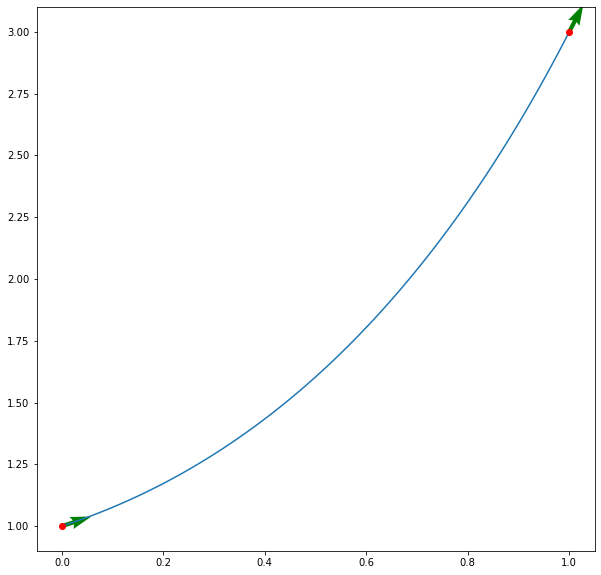

In [33]:
#Exemple qui fonctionne :

t=np.linspace(0,1,100)
P1=np.array([0,1])
P2=np.array([1,3])
u1=np.array([3,2])
u2=np.array([1,4])

Z=gamma(t,P1,P2,u1,u2)
plt.plot(Z[0],Z[1])
plt.plot(P1,P2, 'bo',color='r')

vecteur1 = plt.quiver(P1[0],P1[1],u1[0],u1[1], color='g',angles='xy', units='xy')
vecteur2 = plt.quiver(P2[0],P2[1],u2[0],u2[1], color='g',angles='xy', units='xy')

plt.show()

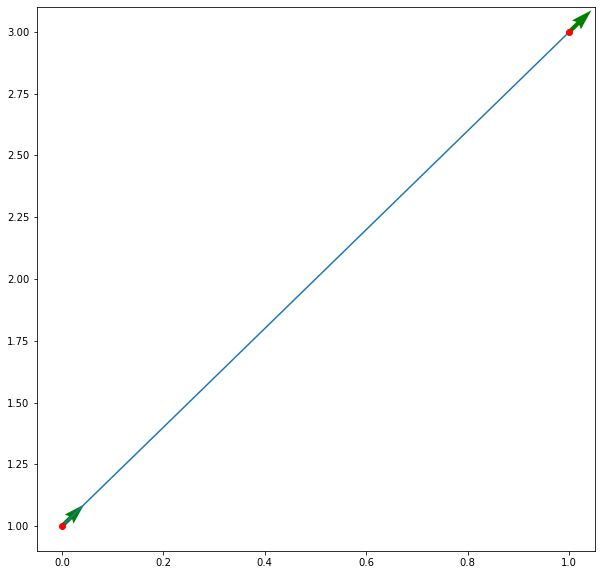

In [34]:
#Exemple qui ne fonctionne pas, celà renvoie donc une interpolation linéaire :

t=np.linspace(0,1,100)
P1=np.array([0,1])
P2=np.array([1,3])
u1=np.array([1,2])
u2=np.array([1,2])

Z=gamma(t,P1,P2,u1,u2)
plt.plot(Z[0],Z[1])
plt.plot(P1,P2, 'bo',color='r')

vecteur1 = plt.quiver(P1[0],P1[1],u1[0],u1[1], color='g',angles='xy', units='xy')
vecteur2 = plt.quiver(P2[0],P2[1],u2[0],u2[1], color='g',angles='xy', units='xy')

plt.show()

#### Tâche 7

In [36]:
def level_curve3(f, x0, y0, delta=0.1, n=1000, eps=eps, oversampling=1):
    liste = [[x0, y0]]
    c = f(x0, y0)
    i = 0
    segment_atteint = False
    
    while i < n and segment_atteint == False :
        a, b = liste[-1][0], liste[-1][1]
        P = Pt_suivant(f, a, b, c, delta, eps)
        liste.append(P)
        if i > 1 and np.sqrt((P[0]-x0)**2+(P[1]-y0)**2) < delta and np.sqrt((P[0]-liste[1][0])**2+(P[1]-liste[1][1])**2) < delta :
            segment_atteint = True
        i = i+1
        
    if oversampling == 1:
        return liste
    
    else:
        for k in range(len(liste)-1):
            i = k*oversampling # on prend en compte que la liste gagne oversampling -1 points à chaque itération
                               # entre ce qui était initialement les points i et i+1
            Li = J(f)(liste[i][0], liste[i][1]) # gradient au point i
            Lii = J(f)(liste[i+1][0], liste[i+1][1]) # gradient au point i+1
            G = gamma(np.linspace(0, 1, oversampling+1), liste[i], liste[i+1], [Li[1], -Li[0]], [Lii[1], -Lii[0]]).T 
            # chemin entre les points i et i+1

            for j in range(len(G)-2, 0, -1): # on enlève les points extrémaux car ils sont déjà présents dans la liste.
                liste.insert(i+1, G[j])  
                # on insère "par la fin" car la fonction insert insère les points à gauche du point i+1.
        return liste 

#### Tâche 8

In [37]:
def display_contour4(f, x, y, x0, y0, levels, os=1):  
    # même fonction que display_contour2 mais appelle la fonction level_curve3
    
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)
    fig, ax = plt.subplots()
    contour_set = plt.contour(
        X, Y, Z, colors="grey", linestyles="dashed",
        levels=levels
    )
    ax.clabel(contour_set)
    plt.grid(True)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")
    plt.gca().set_aspect("equal")

    L = np.array(level_curve3(f, x0, y0, oversampling=os)).T
    plt.plot(L[0], L[1], 'o')

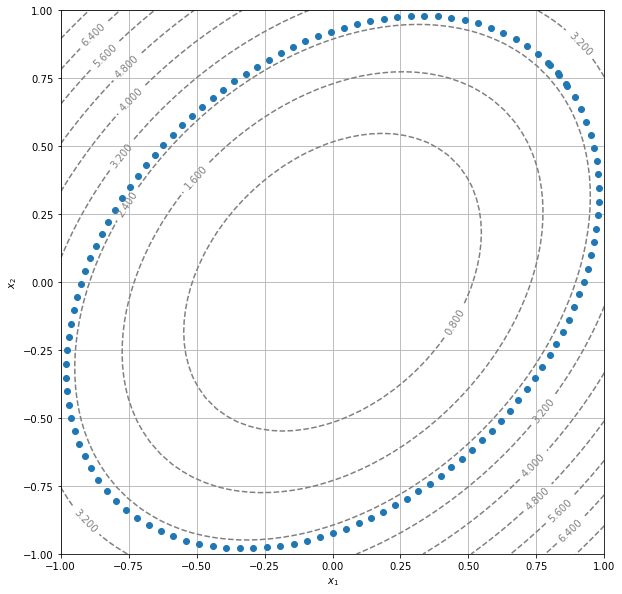

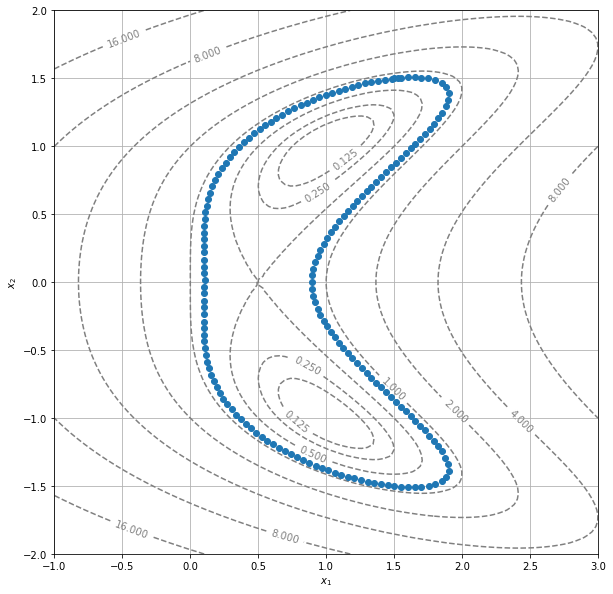

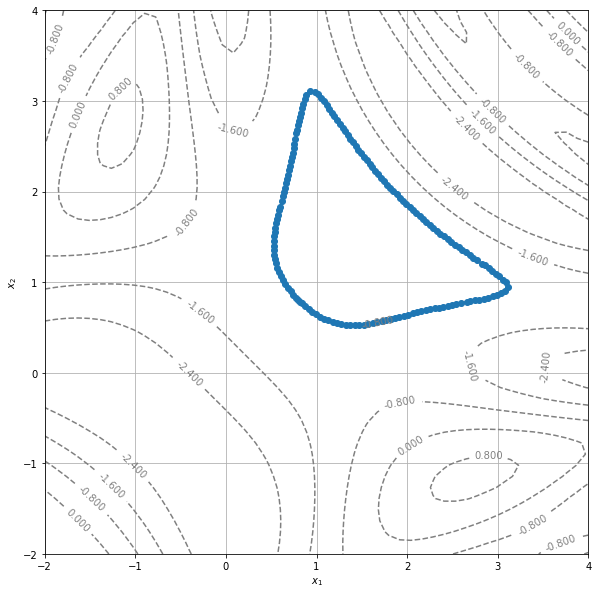

In [40]:
x=np.linspace(-1,1,50)
y=np.linspace(-1,1,50)
display_contour4(f1,x,y,0.8,0.8,10,os=2)


x=np.linspace(-1.0, 3.0, 100), 
y=np.linspace(-2.0, 2.0, 100)
display_contour4(f2,x,y,1.5,1.5,[2**i for i in range(-3, 8)],os=2)

x=np.linspace(-2,4,50)
y=np.linspace(-2,4,50)
display_contour4(f3,x,y,0.8,0.8,5,os=2)